In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [36]:
entries_df = pd.read_json("../data/large_files/ruland-emlap.json")
entries_df = entries_df.drop_duplicates(subset=["Lemma", "emlap_instances_N"])


aentries_df.sort_values("emlap_instances_N", ascending=False)["emlap_instances"][100:]

In [28]:
entries_df["emlap_instances"][1]

[]

In [26]:
entries_df[entries_df["ID"].str.startswith("Ruland1612-Al", na=False)]

,ID,entry_xml,Type,XML_ID,Lemma,Phrase,Variants,Notes,Definitions,Translations,relemmatized,emlap_instances,instances_ids,emlap_instances_N
117,Ruland1612-Aliter,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alit...",A,None,Aliter,None,[],[],"[sic distinguitur aerugo aeris: 1. Aerugo, col...","[Grünspan, Gruͤnspan auff einem Kupffer Glaͤße...",aliter,"[[100001, 1220, Praeparat ast aliter alius:], ...","[100001, 100002, 100002, 100002, 100002, 10000...",777
143,Ruland1612-Alabastrites,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alab...",A,None,Alabastrites,None,[],[],"[, Alabaster stein ...","[Alabaster stein, weisser Alabaster Stein, Bun...",alabastrites,[],[],0
144,Ruland1612-Alahabar,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alah...",A,None,Alahabar,None,"[alabari, alchonor, allarinoch, albohonoch, al...",[],"[id est, plumbum, allabor, alcamor, idem.]",[],alahabar,[],[],0
145,Ruland1612-Alafor,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alaf...",A,None,Alafor,None,[alafort],[],"[, id est, sal Alkali, alafort idem.]",[],alafor,"[[100026, 486, Alafor, id est sal alkali Aspal...","[100026, 100032]",2
146,Ruland1612-Alahic,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alah...",A,None,Alahic,None,[],[],"[, Etliche sagenses sey ein Ofen der Alchymist...","[, Etliche sagenses sey ein Ofen der Alchymist...",alahic,[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Ruland1612-Alzimar,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alzi...",A,None,Alzimar,None,[],[],[ist das Gruͤn],[ist das Gruͤn],alzimar,[],[],0
334,Ruland1612-Alzilat,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alzi...",A,None,Alzilat,None,[],[],"[, id est, pondus trium granorum.]",[],alzilo,[],[],0
335,Ruland1612-Alzofar,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alzo...",A,None,Alzofar,None,[],[],"[id est, aes vstum.]",[],alzofar,[],[],0
347,Ruland1612-Alterum,"{'attrib': {'type': 'A', 'n': 'Ruland1612-Alte...",A,None,Alterum,None,[],[Tertium armatura vestitum ferrei coloris. Ein...,"[cinerei coloris Hildeshemium, omni armatura v...","[Ein anders mit Messingfarb ober¬, klein Re¬, ...",alter,"[[100001, 358, Altera qui longo retinet taurin...","[100001, 100001, 100001, 100001, 100001, 10000...",2365


In [8]:
emlap_metadata = pd.read_csv(
        "https://raw.githubusercontent.com/CCS-ZCU/EMLAP_ETL/refs/heads/master/data/emlap_metadata.csv",
        sep=";",
    )
emlap_metadata.head(5)

,working_title,No.,is_done,is_noscemus,if_noscemus_id,"#if is_noscemus = True, don't transcribe",AUTHORSHIP,is_one_author,#if more than 1 author skip section and choose compendium below,is_author_known,...,source_of_file,origin_of_copy,REFERENCES,catalogue_reference,secondary_references,general_comments,OTHER,filename,Unnamed: 64,tokens_N
0,"Augurello, Chrysopoeia",100001,True,True,713324.0,NaN,NaN,True,NaN,True,...,Noscemus,Unknown,NaN,Noscemus Wiki,Soranzo 2019,The 1518 Basel version is also in Noscemus,NaN,"Augurello,_Giovanni_Aurelio_-_Chrysopoeia__Ven...",NaN,23718
1,"Pseudo-Lull, Secretis",100002,True,False,NaN,NaN,NaN,True,NaN,True,...,MDZ,MBS,NaN,Hirsch 1950,NaN,"There is a prior, 1514 edition of De secretis ...",NaN,Pseudo-Lull1518_De_secretis_naturae_MDZ.pdf,NaN,24673
2,"Pantheus, Ars Transmutatione",100003,True,False,NaN,NaN,NaN,True,NaN,True,...,GB,BL,NaN,NaN,NaN,This book was first published in 1518 with an ...,NaN,Pantheus1518_Ars_Transmutationis_Metallicae_BL...,NaN,8646
3,"Pantheus, Commentarium",100004,True,False,NaN,NaN,NaN,True,NaN,True,...,MDZ,MSB,NaN,NaN,NaN,This 1519 book is catalogued wrongly by many l...,NaN,Pantheus1519_Commentarium_Transmutationis_Meta...,NaN,3521
4,"Pantheus, Voarchadumia",100005,True,False,NaN,NaN,NaN,True,NaN,True,...,ONB,ONB,NaN,NaN,NaN,Dedicated to Leonellus Marquis of Estense,NaN,Pantheus1530_Voarchadumia_ONB.pdf,NaN,20386


In [9]:
emlap_metadata.columns

Index(['working_title', 'No.', 'is_done', 'is_noscemus', 'if_noscemus_id',
       '#if is_noscemus = True, don't transcribe', 'AUTHORSHIP',
       'is_one_author',
       '#if more than 1 author skip section and choose compendium below',
       'is_author_known', 'author_name', 'author_name_alternatives',
       'author_viaf', 'author_cerl', 'author_comments', 'is_compendium',
       'if_compendium', 'TRANSLATION / EDITORSHIP', 'is_translator',
       'translator_name', 'translator_name_alternatives', 'translator_viaf',
       'translator_cerl', 'translator_comments', 'is_editor', 'editor_name',
       'editor_name_alternatives', 'editor_viaf', 'editor_cerl',
       'editor_comments', 'DATE OF PUBLICATION', 'date_publication',
       'date_certainty', 'date_not_after', 'date_not_before', 'date_comment',
       'TITLE', 'title_short', 'title_full', 'title_viaf', 'title_comments',
       'PLACE OF PUBLICATION', 'place_publication', 'place_geonames',
       'place_comments', 'PUBLISHER', 

In [10]:
emlap_metadata["labeldate"] = emlap_metadata.apply(lambda row: row["working_title"] + " ({})".format(str(row["date_publication"])), axis=1)

In [11]:
emlap_metadata.sort_values("date_publication", ascending=True, inplace=True)

In [59]:
# emlap_id_label_dict = dict(zip(emlap_metadata["No."], emlap_metadata["labeldate"]))

In [18]:
def make_plot_bar(entry):
    # Get instance IDs for the entry
    instances_ids = entries_df[entries_df["Lemma"] == entry]["instances_ids"].tolist()[0]
    counter = Counter(instances_ids)

    # Extract the keys (labels) and their corresponding counts (frequencies)
    emlap_metadata_instances = emlap_metadata.copy()
    emlap_metadata_instances["Frequency"] = (
        emlap_metadata_instances["No."].map(counter).fillna(0).astype(int)
    )

    # Add bidecade labels to the DataFrame
    def get_bidecade_label(year):
        if not np.isnan(year):  # Handle NaN years safely
            start = (year // 20) * 20  # Determine the starting year of the bidecade
            end = start + 19  # Determine the ending year of the bidecade
            return f"{start}-{end}"
        return None

    emlap_metadata_instances["Bidecade"] = emlap_metadata_instances["date_publication"].apply(get_bidecade_label)

    # Group by Bidecade and sum frequencies and tokens_N
    emlap_instances_grouped = (
        emlap_metadata_instances.groupby("Bidecade", dropna=True)[["Frequency", "tokens_N"]]
        .sum()
        .reset_index()
    )

    # Sort bidecade intervals numerically
    emlap_instances_grouped = emlap_instances_grouped.sort_values(
        by="Bidecade",
        key=lambda col: col.str.extract(r"(\d+)")[0].astype(int)
    )

    # Calculate relative frequency (Frequency / tokens_N)
    emlap_instances_grouped["RelativeFrequency"] = (
        emlap_instances_grouped["Frequency"] / emlap_instances_grouped["tokens_N"]
    )

    # Calculate relative frequency for individual works
    emlap_metadata_instances["RelativeFrequency"] = (
        emlap_metadata_instances["Frequency"] / emlap_metadata_instances["tokens_N"]
    )

    # Create the 4 subplots (2x2 layout)
    fig, axes = plt.subplots(2, 2, figsize=(20, 15), dpi=300)

    # Plot 1: Absolute frequency vs. bidecades
    ax1 = axes[0, 0]
    ax1.bar(
        emlap_instances_grouped["Bidecade"],
        emlap_instances_grouped["Frequency"],
        color="blue"
    )
    ax1.set_xlabel("Bidecades", fontsize=12)
    ax1.set_ylabel("Absolute Frequency", fontsize=12)
    ax1.set_title(f"Absolute Frequency of '{entry}' by Bidecades", fontsize=14)
    ax1.set_xticks(range(len(emlap_instances_grouped["Bidecade"])))
    ax1.set_xticklabels(emlap_instances_grouped["Bidecade"], rotation=90)

    # Plot 2: Relative frequency vs. bidecades
    ax2 = axes[0, 1]
    ax2.bar(
        emlap_instances_grouped["Bidecade"],
        emlap_instances_grouped["RelativeFrequency"],
        color="orange"
    )
    ax2.set_xlabel("Bidecades", fontsize=12)
    ax2.set_ylabel("Relative Frequency (Frequency / tokens_N)", fontsize=12)
    ax2.set_title(f"Relative Frequency of '{entry}' by Bidecades", fontsize=14)
    ax2.set_xticks(range(len(emlap_instances_grouped["Bidecade"])))
    ax2.set_xticklabels(emlap_instances_grouped["Bidecade"], rotation=90)

    # Plot 3: Absolute frequency vs. works
    ax3 = axes[1, 0]
    ax3.bar(
        emlap_metadata_instances["labeldate"],
        emlap_metadata_instances["Frequency"],
        color="green"
    )
    ax3.set_xlabel("Works", fontsize=12)
    ax3.set_ylabel("Absolute Frequency", fontsize=12)
    ax3.set_title(f"Absolute Frequency of '{entry}' by Works", fontsize=14)
    ax3.set_xticks(range(len(emlap_metadata_instances["labeldate"])))
    ax3.set_xticklabels(emlap_metadata_instances["labeldate"], rotation=90)

    # Plot 4: Relative frequency vs. works
    ax4 = axes[1, 1]
    ax4.bar(
        emlap_metadata_instances["labeldate"],
        emlap_metadata_instances["RelativeFrequency"],
        color="red"
    )
    ax4.set_xlabel("Works", fontsize=12)
    ax4.set_ylabel("Relative Frequency (Frequency / tokens_N)", fontsize=12)
    ax4.set_title(f"Relative Frequency of '{entry}' by Works", fontsize=14)
    ax4.set_xticks(range(len(emlap_metadata_instances["labeldate"])))
    ax4.set_xticklabels(emlap_metadata_instances["labeldate"], rotation=90)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

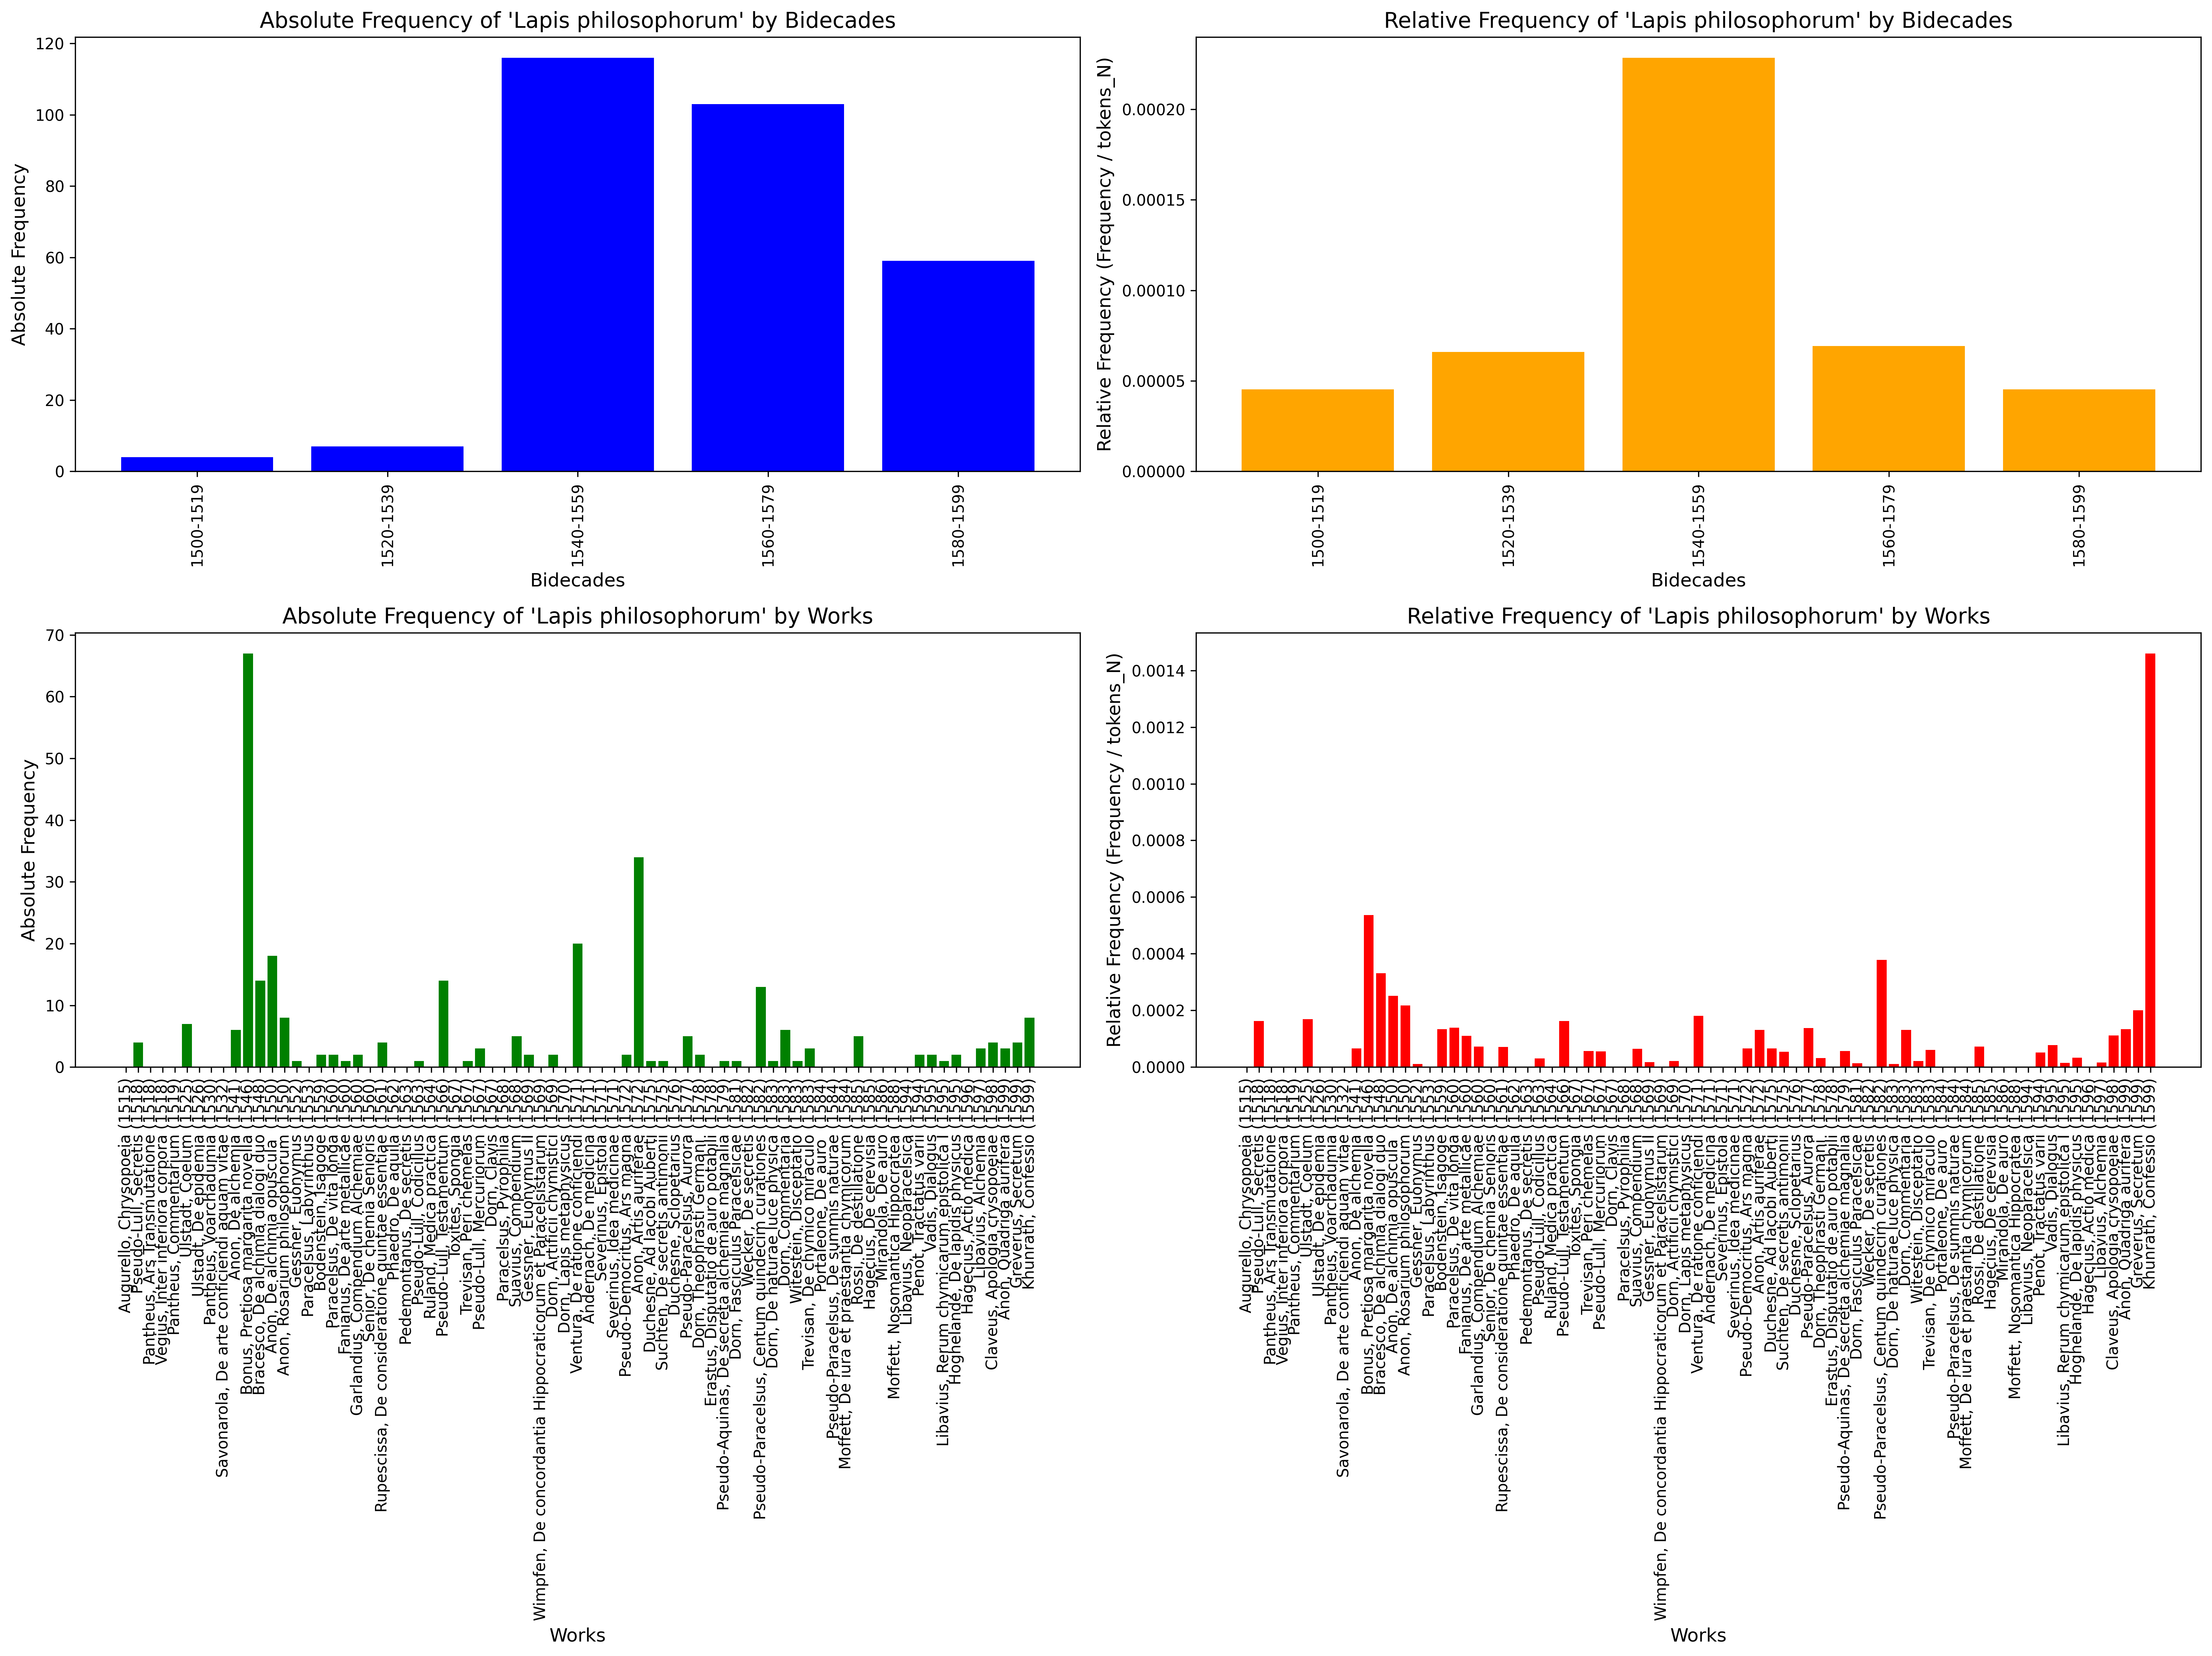

In [19]:
entry = "Lapis philosophorum"
make_plot_bar(entry)